<a href="https://colab.research.google.com/github/Divya-Gajjar/Colab_repository/blob/master/credictcarddefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook is about Credit Card Fraud Detection.


# Overall scenario of this notebook is:

This is a classification problem statement, where have to make the model to predict the correct fraud of the credict card and to get best fitted model for that. Best fitted model is also mean that the recall of that model have to be the best.

comparing the models like logistic regression, decision tree and random forest with all the variables and  the most valuable top 10 variables from feature engineering method to get the best results.



Importing the Inbuild methods from libaries of machine learning

In [0]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


Read the data into the variable df

In [0]:
df = pd.read_csv("/content/creditcardfraud.csv")

check the head of the data to get the overview of data..

Data of credit card fraud has all the numeric values.

In [85]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check whether the data has missing values or not. 

*Credit card fraud has no missing values.*

In [86]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Let's observe the data using some plot..

*This is the anonymous fraud detection problem.* 
Plot of the attribute Class have an unbalanced dataset for fraud. 

Text(0.5, 1.0, 'Class\n(0 :No Fraud||1: Fraud)')

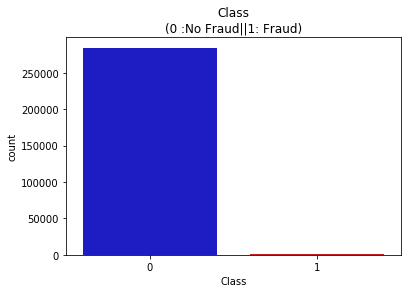

In [87]:
colors = ["#0101DF","#DF0101"]
sn.countplot('Class',data = df,palette=colors)
plt.title("Class\n(0 :No Fraud||1: Fraud)")

Let's see the correlation graph of the data because it's easy to undestand.

There's very low correlation between attributes, aalmost like no correlation.

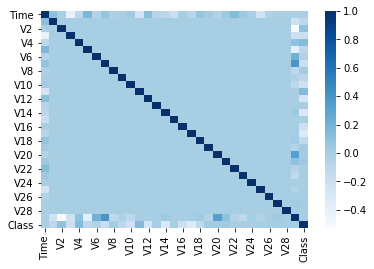

In [89]:
corelation = df.corr()
sn.heatmap(corelation, cmap = "Blues")

# Modeling:

There's a three function of the models are logistic regression, decision tree and random forest.

Fit the models on every Features of the dataset.

Feature Engineering on the data to get the most valuable features.

Fit the models on most vaaluable variables. 

Then find out which model performs the best.

and at last which model have the lowest False Negative.




**Logistic classification function**


In [0]:
def logistic_clf():
  global log_clf
  
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True) 
  
  from sklearn.linear_model import LogisticRegression
  log_clf=LogisticRegression().fit(xtrain, ytrain)
  print("\n**Logistic Regression**\n")
  
  print('train accuracy',log_clf.score(xtrain,ytrain))
  print('test accuracy',log_clf.score(xtest,ytest))
  
  y_pred = log_clf.predict(xtest)
  
  from sklearn.metrics import classification_report, confusion_matrix
  print("classification report :  \n ", classification_report(ytest, y_pred))
  print("confusion matrix:\n",confusion_matrix(ytest,y_pred))
  confusion_matrix = confusion_matrix(ytest, y_pred)
  
  return;


**Function of the Decision Tree**

In [0]:
def decision_tree():
  global dec_clf
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
  
  from sklearn import tree
  dec_clf = tree.DecisionTreeClassifier().fit(xtrain, ytrain)
  print("\n**Decision Tree**\n")
  
  print('train accuracy',dec_clf.score(xtrain,ytrain))
  print('test accuracy',dec_clf.score(xtest,ytest))
 
  y_pred = dec_clf.predict(xtest)
  
  from sklearn.metrics import classification_report, confusion_matrix
  print("classification report :  \n ", classification_report(ytest, y_pred))
  print("confusion matrix:\n",confusion_matrix(ytest,y_pred))
  confusion_matrix = confusion_matrix(ytest, y_pred)  
  
  return;


**Function of Random Forest**



In [0]:
def random_forest():
  global random_clf
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
  from sklearn.ensemble import RandomForestClassifier
  random_clf = RandomForestClassifier(max_depth=15, random_state=0)
  random_clf.fit(xtrain,ytrain)
  print("\n**Random forest**\n")
  
  print('train accuracy',random_clf.score(xtrain,ytrain))
  print('test accuracy',random_clf.score(xtest,ytest))
  
  y_pred = random_clf.predict(xtest)
  
  from sklearn.metrics import classification_report, confusion_matrix
  print("classification report :  \n ", classification_report(ytest, y_pred))
  print("confusion matrix:\n",confusion_matrix(ytest,y_pred))
  confusion_matrix = confusion_matrix(ytest, y_pred)  
  
  return;


Using all the variables in model, best fitted model is **Random forest** and it is also have low False Negative value.  

In [93]:
x = df[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]
y = df[['Class']]
logistic_clf()
decision_tree()
random_forest()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



**Logistic Regression**

train accuracy 0.9989416343973837
test accuracy 0.9989934810341398
classification report :  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.66      0.68       136

    accuracy                           1.00     85443
   macro avg       0.85      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix:
 [[85267    40]
 [   46    90]]

**Decision Tree**

train accuracy 1.0
test accuracy 0.9990051847430451
classification report :  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.70      0.72      0.71       146

    accuracy                           1.00     85443
   macro avg       0.85      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix:
 [[85253    44]
 [   41   105]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



**Random forest**

train accuracy 0.9997592343652816
test accuracy 0.9995669627705019
classification report :  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.92      0.81      0.86       140

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix:
 [[85293    10]
 [   27   113]]


Feature Engineering of the variables using Recursive Feature Elimination

In [144]:
#dividing data into x and y
x = df[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]
y = df[['Class']]

#build model for feature engineering
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(max_depth=15, random_state=0)
random_clf.fit(xtrain,ytrain)
#feature engineering
from sklearn.feature_selection import RFE
selector = RFE(clf,10).fit(x,y)
l1 = selector.ranking_
l2 = x.columns
for i in zip(l1,l2):
  print(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(11, 'Time')
(6, 'V1')
(20, 'V2')
(21, 'V3')
(2, 'V4')
(13, 'V5')
(16, 'V6')
(1, 'V7')
(8, 'V8')
(18, 'V9')
(1, 'V10')
(9, 'V11')
(1, 'V12')
(7, 'V13')
(1, 'V14')
(1, 'V15')
(1, 'V16')
(1, 'V17')
(19, 'V18')
(3, 'V19')
(4, 'V20')
(14, 'V21')
(5, 'V22')
(10, 'V23')
(1, 'V24')
(17, 'V25')
(1, 'V26')
(1, 'V27')
(12, 'V28')
(15, 'Amount')


Using top Feature engineering varibles, best fitted model is **Random Forest** and it is also have low False Negative value. 

In [145]:
x = df[['V7','V10','V12','V14','V15','V16','V17','V24','V26','V27']]
y = df[['Class']]
logistic_clf()
decision_tree()
random_forest()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



**Logistic Regression**

train accuracy 0.9991222086234225
test accuracy 0.999204147794436
classification report :  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.90      0.58      0.71       142

    accuracy                           1.00     85443
   macro avg       0.95      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix:
 [[85292     9]
 [   59    83]]

**Decision Tree**

train accuracy 1.0
test accuracy 0.9992158515033414
classification report :  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.75      0.78      0.77       141

    accuracy                           1.00     85443
   macro avg       0.88      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix:
 [[85266    36]
 [   31   110]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



**Random forest**

train accuracy 0.9997943460203447
test accuracy 0.9995318516437859
classification report :  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.92      0.81      0.86       150

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix:
 [[85282    11]
 [   29   121]]


# ROC Curve

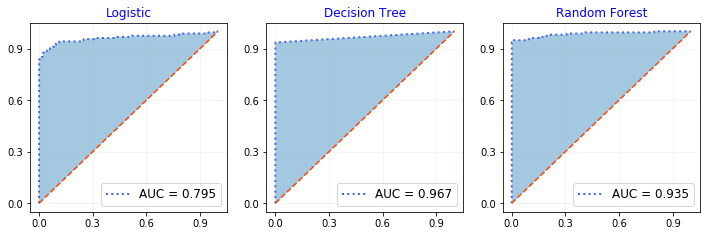

In [149]:
import itertools
from sklearn.metrics import roc_curve,roc_auc_score,auc
name_model = ['Logistic','Decision Tree','Random Forest']
models = [log_clf,dec_clf,random_clf]
length = len(models)
fig = plt.figure(figsize=(12,16))
#fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(models,range(length),name_model) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(xtest)
    predictions   = i.predict(xtest)
    fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(ytest,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "w")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    #qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

# Heat map of Confusion Matrix for all three models



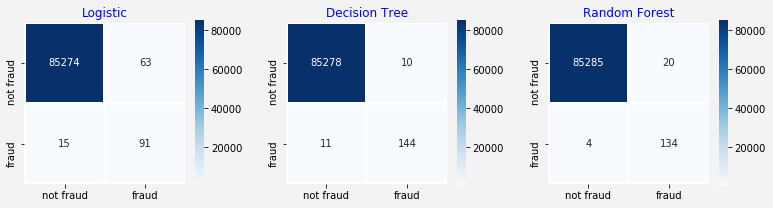

In [150]:
import itertools
name_model = ['Logistic','Decision Tree','Random Forest']
models = [log_clf,dec_clf,random_clf]
length = len(models)

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(models,range(length),name_model) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(xtest)
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(predictions,ytest)
    sn.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not fraud","fraud"],
                yticklabels=["not fraud","fraud"],
                linewidths = 2,linecolor = "w",cmap = "Blues")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

# Conclusion:

In Credit card fraud detection Random Forest is the Best perfomed model because it gives the almost same accuracy to other models but what matters the most in this business kind of problem statment is good recall, so this random forest model is  good at identifying the True negative and True positive as well as False Negative.